In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re

In [2]:
class DataLoader:
  def __init__(self,dir_name,file_name):
    self.dir_name=dir_name
    self.file_name = file_name
    
 
  def read_csv(self):
    os.chdir(self.dir_name)
    tweets_df=pd.read_csv(self.file_name)
    return tweets_df

In [3]:
DataLoader_obj= DataLoader('../Notebooks','cleaned_fintech_data.csv')

In [4]:
#To read csv file and create dataframe
tweets = pd.read_csv('cleaned_fintech_data.csv')
tweets.head()

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,...,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1,1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\r\nPanja - 32.5cr\r\nGabbarsin...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,...,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2,2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,...,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,...,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00


In [5]:
#To get information abou the data
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5620 non-null   float64
 1   created_at              5621 non-null   object 
 2   source                  5621 non-null   object 
 3   original_text           5621 non-null   object 
 4   clean_text              5617 non-null   object 
 5   sentiment               5621 non-null   object 
 6   polarity                5621 non-null   object 
 7   subjectivity            5621 non-null   object 
 8   lang                    5621 non-null   object 
 9   favorite_count          5621 non-null   object 
 10  retweet_count           5621 non-null   object 
 11  original_author         5621 non-null   object 
 12  screen_count            5621 non-null   object 
 13  followers_count         5621 non-null   object 
 14  friends_count           5621 non-null   

In [6]:
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columons having columns value:{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s): 17941
Columons having columns value:Index(['Unnamed: 0', 'clean_text', 'possibly_sensitive', 'hashtags', 'place',
       'place_coord_boundaries'],
      dtype='object')


In [7]:
'''
Data Preparation
'''

'\nData Preparation\n'

In [8]:
tweets_df = pd.DataFrame(columns=['original_text','clean_text','lang'])

tweets_df['original_text'] =  tweets['original_text'].to_list()
tweets_df['clean_text'] =  tweets['clean_text'].to_list()
tweets_df['lang'] = tweets['lang'].to_list()

In [9]:
# drop row having Null value
tweets_df.dropna()
tweets_df

,original_text,clean_text,lang
0,Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,en
1,Teenmaar - 26cr\r\nPanja - 32.5cr\r\nGabbarsin...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,in
2,Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,hi
3,Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,en
4,Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,en
...,...,...,...
5616,"Lambie has voted AGAINST Medivac, Carbon tax, ...",Lambie voted AGAINST Medivac Carbon tax protec...,en
5617,Idhi me bathuku \r\nMost Day1 Records In Nizam...,Idhi bathuku Most Day1 Records In Nizam Non BB...,in
5618,welkin moon giveaway bc i finally have money!\...,welkin moon giveaway bc finally money -u got t...,en
5619,Manam edi chesina \r\n\r\nDaaniki kuda elevati...,Manam edi chesina Daaniki kuda elevation istad...,et


In [10]:
cleanTweet= pd.DataFrame(columns=['clean_text','polarity'])
cleanTweet['polarity'] =  tweets['polarity'].to_list()
cleanTweet['clean_text'] =  tweets['clean_text'].to_list()

In [11]:
cleanTweet.dropna()
cleanTweet

,clean_text,polarity
0,Giving forth life becoming burden Kenya This m...,0.3194444444444445
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.0
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.0
3,Today World Day Combat Restoring degraded land...,0.25
4,Hearing say 's confident vaccines delivered li...,0.5
...,...,...
5616,Lambie voted AGAINST Medivac Carbon tax protec...,0.13636363636363635
5617,Idhi bathuku Most Day1 Records In Nizam Non BB...,0.5
5618,welkin moon giveaway bc finally money -u got t...,0.15416666666666667
5619,Manam edi chesina Daaniki kuda elevation istad...,0.0


In [12]:
def text_category(p):
        if p > 0:
            return 'positive'
        elif p < 0:
            return 'negative'
        else:
            return 'neutral'

In [13]:
cleanTweet['polarity'] = pd.to_numeric(cleanTweet['polarity'],errors='coerce') # change polarity to numeric
cleanTweet['score'] = cleanTweet['polarity'].apply(text_category)
cleanTweet.head()

,clean_text,polarity,score
0,Giving forth life becoming burden Kenya This m...,0.319444,positive
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.000000,neutral
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.000000,neutral
3,Today World Day Combat Restoring degraded land...,0.250000,positive
4,Hearing say 's confident vaccines delivered li...,0.500000,positive


In [14]:
#Visualize The  𝐬𝐜𝐨𝐫𝐞  column using piechart and barchart
#summary function about the score
def counts_numOfPNN(List_of_Score):
    x=List_of_Score
    
    #returns a dictiory of which there is key and value
    
    return {
        'positive': x.count('positive'),
        'neutral': x.count('neutral'),
        'negative': x.count('negative')  }

In [15]:
counts_of_PNN = counts_numOfPNN(list(cleanTweet['score']))
labels = list(counts_of_PNN.keys())
data = list(counts_of_PNN.values())

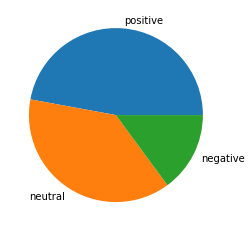

In [16]:
# plot it
fig = plt.figure()
plt.pie(data, labels = labels)
plt.show()

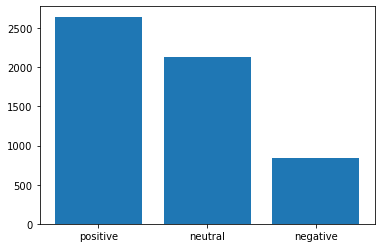

In [17]:
figg=plt.figure()
plt.bar(labels,data)
plt.show()

In [18]:
# Remove rows from cleanTweest where  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲   = 0  (i.e where  𝐬𝐜𝐨𝐫𝐞  = Neutral) and reset the frame index.
cleanTweet = cleanTweet[cleanTweet['score'] != 'neutral'].reset_index(drop=True)

In [19]:
cleanTweet.head()

,clean_text,polarity,score
0,Giving forth life becoming burden Kenya This m...,0.319444,positive
1,Today World Day Combat Restoring degraded land...,0.250000,positive
2,Hearing say 's confident vaccines delivered li...,0.500000,positive
3,Today World Day Combat Restoring degraded land...,0.250000,positive
4,Austria `` right '' grid tariffs regulatory re...,0.285714,positive


In [20]:
# Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column
def score_to_bin(scr):
    scor = (1 if scr == 'positive' else 0)
    return scor

In [21]:
cleanTweet['scoremap'] = cleanTweet['score'].apply(score_to_bin).dropna()

In [22]:
cleanTweet.head()

,clean_text,polarity,score,scoremap
0,Giving forth life becoming burden Kenya This m...,0.319444,positive,1
1,Today World Day Combat Restoring degraded land...,0.250000,positive,1
2,Hearing say 's confident vaccines delivered li...,0.500000,positive,1
3,Today World Day Combat Restoring degraded land...,0.250000,positive,1
4,Austria `` right '' grid tariffs regulatory re...,0.285714,positive,1


In [26]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [27]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
                       tweets_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

AttributeError: 'DataFrame' object has no attribute 'hashtags'

In [28]:
# update Hashtage columon with hashtages extracted from Orignal_text columon
tweets_df['hashtags'] = tweets_df.original_text.apply(find_hashtags)
print(tweets_df['hashtags'])

0                                                      []
1                                                      []
2                                                      []
3       [#Desertification, #Drought, #resilience, #bio...
4                         [#GregHunt, #Morrison, #auspol]
                              ...                        
5616                                             [#QandA]
5617                                                   []
5618                                                   []
5619                                                   []
5620                                                   []
Name: hashtags, Length: 5621, dtype: object


In [29]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
                       tweets_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [30]:
hashtags_list_df

,hashtags
3,"[#Desertification, #Drought, #resilience, #bio..."
4,"[#GregHunt, #Morrison, #auspol]"
5,"[#HowRutoSabotagedUhuru, #JKLive, #javascript,..."
6,"[#Desertification, #Drought, #resilience, #bio..."
9,[#microgrids]
...,...
5611,[#QandA]
5613,"[#npcindia, #webinar, #wastemgmt, #carboncredi..."
5614,"[#mobilemoney, #Burundi, #youth, #innovation]"
5615,"[#CarbonSmart, #OurCleanFuture]"


In [31]:
 #create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [32]:
flattened_hashtags_df

,hashtag
0,#Desertification
1,#Drought
2,#resilience
3,#biodiversity
4,#climatechange
...,...
4245,#youth
4246,#innovation
4247,#CarbonSmart
4248,#OurCleanFuture


In [33]:
#add flatten_hashtags to tweet_df
tweets_df["flattened_hashtags"]= flattened_hashtags_df

In [34]:
tweets_df

,original_text,clean_text,lang,hashtags,flattened_hashtags
0,Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,en,[],#Desertification
1,Teenmaar - 26cr\r\nPanja - 32.5cr\r\nGabbarsin...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,in,[],#Drought
2,Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,hi,[],#resilience
3,Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,en,"[#Desertification, #Drought, #resilience, #bio...",#biodiversity
4,Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,en,"[#GregHunt, #Morrison, #auspol]",#climatechange
...,...,...,...,...,...
5616,"Lambie has voted AGAINST Medivac, Carbon tax, ...",Lambie voted AGAINST Medivac Carbon tax protec...,en,[#QandA],NaN
5617,Idhi me bathuku \r\nMost Day1 Records In Nizam...,Idhi bathuku Most Day1 Records In Nizam Non BB...,in,[],NaN
5618,welkin moon giveaway bc i finally have money!\...,welkin moon giveaway bc finally money -u got t...,en,[],NaN
5619,Manam edi chesina \r\n\r\nDaaniki kuda elevati...,Manam edi chesina Daaniki kuda elevation istad...,et,[],NaN


<AxesSubplot:>

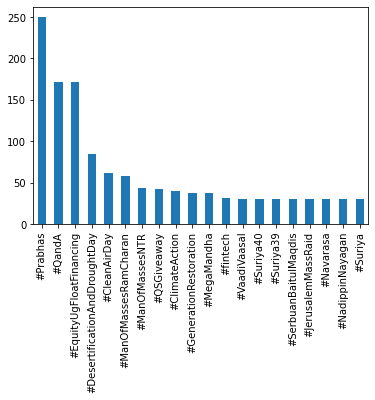

In [35]:
# To plot Top 20 Hashtags
tweets_df['flattened_hashtags'].value_counts()[:20].plot(kind='bar')


In [36]:
#ploting Tweets by language 
tweets = pd.DataFrame(columns=['text','lang'])

tweets['text'] =  tweets_df['clean_text'].to_list()
tweets['lang'] = tweets_df['lang'].to_list()

tweets_by_lang = tweets['lang'].value_counts()

<AxesSubplot:title={'center':'Top 5 languages'}, xlabel='Languages', ylabel='Number of tweets'>

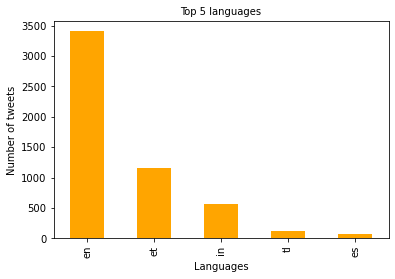

In [37]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 5 languages', fontsize=10)
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange')

In [38]:
#from Our Language analysis we can see there are differnt languages we can select only tweets with english 
English_tweets = tweets_df.loc[tweets_df['lang'] =="en"]

In [39]:
English_tweets

,original_text,clean_text,lang,hashtags,flattened_hashtags
0,Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,en,[],#Desertification
3,Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,en,"[#Desertification, #Drought, #resilience, #bio...",#biodiversity
4,Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,en,"[#GregHunt, #Morrison, #auspol]",#climatechange
5,Buy airtime across all networks from Mpesa eve...,Buy airtime across networks Mpesa even Fuliza ...,en,"[#HowRutoSabotagedUhuru, #JKLive, #javascript,...",#GregHunt
6,Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,en,"[#Desertification, #Drought, #resilience, #bio...",#Morrison
...,...,...,...,...,...
5613,"Join @NPC_INDIA_GOV webinar on ""Carbon Credits...",Join webinar `` Carbon Credits Waste Managemen...,en,"[#npcindia, #webinar, #wastemgmt, #carboncredi...",NaN
5615,In the latest episode of @LanzaTech’s #CarbonS...,In latest episode podcast Unilevers Peter Ter ...,en,"[#CarbonSmart, #OurCleanFuture]",NaN
5616,"Lambie has voted AGAINST Medivac, Carbon tax, ...",Lambie voted AGAINST Medivac Carbon tax protec...,en,[#QandA],NaN
5618,welkin moon giveaway bc i finally have money!\...,welkin moon giveaway bc finally money -u got t...,en,[],NaN


In [40]:
#text Preprocessing
English_tweets['clean_text']=English_tweets['clean_text'].astype(str)
English_tweets['clean_text'] = English_tweets['clean_text'].apply(lambda x: x.lower())
English_tweets['clean_text']= English_tweets['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


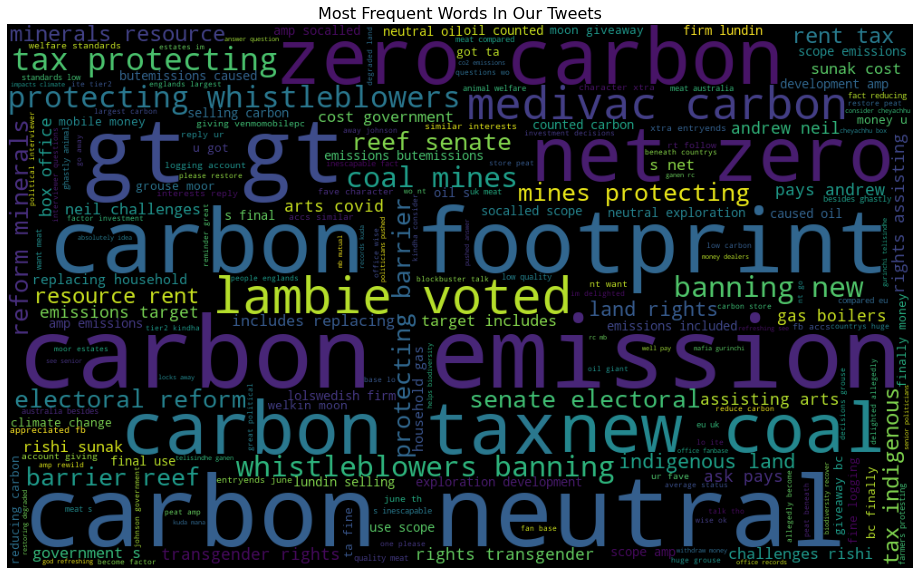

In [41]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(English_tweets.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [42]:
#Converting tweets to list of words For feature engineering
sentence_list = [tweet for tweet in English_tweets['clean_text']]
word_list = [sent.split() for sent in sentence_list]

word_list[:2]


[['giving',
  'forth',
  'life',
  'becoming',
  'burden',
  'kenya',
  'this',
  'mother',
  'gave',
  'birth',
  'babies',
  'hard',
  'time',
  'meeting',
  'nutritional',
  'needs',
  'coz',
  'baby',
  'formula',
  'expensiveturn',
  'bundles',
  'tears',
  'joy',
  'giving',
  'handmpesa',
  'douglas',
  'nyaoko'],
 ['today',
  'world',
  'day',
  'combat',
  'restoring',
  'degraded',
  'land',
  'brings',
  'jobs',
  'food',
  'security',
  'helps',
  'recover',
  'slows',
  'locking',
  'away',
  'carbon',
  'all',
  'critical',
  'lifting',
  'many',
  'poverty']]

In [43]:
#Create dictionary which contains Id and word 
word_to_id = corpora.Dictionary(word_list)
for k, v in word_to_id.items():
    print(k,"........",v)

0 ........ babies
1 ........ baby
2 ........ becoming
3 ........ birth
4 ........ bundles
5 ........ burden
6 ........ coz
7 ........ douglas
8 ........ expensiveturn
9 ........ formula
10 ........ forth
11 ........ gave
12 ........ giving
13 ........ handmpesa
14 ........ hard
15 ........ joy
16 ........ kenya
17 ........ life
18 ........ meeting
19 ........ mother
20 ........ needs
21 ........ nutritional
22 ........ nyaoko
23 ........ tears
24 ........ this
25 ........ time
26 ........ all
27 ........ away
28 ........ brings
29 ........ carbon
30 ........ combat
31 ........ critical
32 ........ day
33 ........ degraded
34 ........ food
35 ........ helps
36 ........ jobs
37 ........ land
38 ........ lifting
39 ........ locking
40 ........ many
41 ........ poverty
42 ........ recover
43 ........ restoring
44 ........ security
45 ........ slows
46 ........ today
47 ........ world
48 ........ confident
49 ........ delivered
50 ........ emissions
51 ........ g7
52 ........ hearing
53 ...

731 ........ cc
732 ........ code
733 ........ dealer
734 ........ dealeragent
735 ........ details
736 ........ dial
737 ........ enter
738 ........ financial
739 ........ float
740 ........ identification
741 ........ mpin
742 ........ password
743 ........ product
744 ........ recieved
745 ........ shall
746 ........ update
747 ........ ussd
748 ........ allows
749 ........ app
750 ........ atms
751 ........ banking
752 ........ convenience
753 ........ customers
754 ........ eazzy
755 ........ far
756 ........ going
757 ........ locations
758 ........ mobile
759 ........ money
760 ........ provides
761 ........ sometimes
762 ........ withdraw
763 ........ businesses
764 ........ covering
765 ........ derby
766 ........ do
767 ........ eligible
768 ........ grants
769 ........ reduction
770 ........ works
771 ........ awards
772 ........ demonstrated
773 ........ designed
774 ........ developed
775 ........ drive
776 ........ institutions
777 ........ proofofconcept
778 ........ sup

1397 ........ price
1398 ........ products
1399 ........ scott
1400 ........ thinks
1401 ........ arises
1402 ........ around
1403 ........ circumstances
1404 ........ creating
1405 ........ forest
1406 ........ grievances
1407 ........ individual
1408 ........ jpa
1409 ........ lowwage
1410 ........ mismatch
1411 ........ qualifications
1412 ........ scholars
1413 ........ sector
1414 ........ simply
1415 ........ structured
1416 ........ digging
1417 ........ flooding
1418 ........ grey
1419 ........ guards
1420 ........ half
1421 ........ imported
1422 ........ lots
1423 ........ natural
1424 ........ oakwe
1425 ........ planted
1426 ........ plastic
1427 ........ possiblebirds
1428 ........ possibly
1429 ........ rewilding
1430 ........ saplings
1431 ........ squirrels
1432 ........ tree
1433 ........ trees
1434 ........ two
1435 ........ without
1436 ........ woodlands
1437 ........ atoms
1438 ........ changing
1439 ........ concrete
1440 ........ graphene
1441 ........ potentiall

2063 ........ country
2064 ........ doesnt
2065 ........ oh
2066 ........ review
2067 ........ spending
2068 ........ trouble
2069 ........ agreement
2070 ........ bonded
2071 ........ boy
2072 ........ c
2073 ........ hawaiian
2074 ........ helped
2075 ........ island
2076 ........ obama
2077 ........ paris
2078 ........ remember
2079 ........ small
2080 ........ solidarity
2081 ........ upbringing
2082 ........ consequential
2083 ........ coverage
2084 ........ headed
2085 ........ headinthesand
2086 ........ matter
2087 ........ present
2088 ........ sticks
2089 ........ travelling
2090 ........ where
2091 ........ committee
2092 ........ implementation
2093 ........ ministries
2094 ........ relevant
2095 ........ roadmap
2096 ........ bar
2097 ........ effective
2098 ........ single
2099 ........ wrecking
2100 ........ brands
2101 ........ commitments
2102 ........ headlinegrabbing
2103 ........ meaningful
2104 ........ persistently
2105 ........ prioritise
2106 ........ prs
2107 .

2730 ........ indirect
2731 ........ nor
2732 ........ rotherham
2733 ........ sheffieldbirmingham
2734 ........ sheffieldleeds
2735 ........ spur
2736 ........ continuing
2737 ........ either
2738 ........ exchange
2739 ........ imaginary
2740 ........ offsets
2741 ........ riskynonexistent
2742 ........ schemes
2743 ........ sometime
2744 ........ undo
2745 ........ usual
2746 ........ birmingham
2747 ........ hybrid
2748 ........ journey
2749 ........ london
2750 ........ nottingham
2751 ........ petrol
2752 ........ powered
2753 ........ referring
2754 ........ advocate
2755 ........ deal2
2756 ........ democracy6
2757 ........ fptp
2758 ........ healthcare
2759 ........ infrastructure4
2760 ........ lanes5
2761 ........ nationalisation
2762 ........ proportional
2763 ........ reliable
2764 ........ representation7
2765 ........ sector3
2766 ........ workplace
2767 ........ catchup
2768 ........ church
2769 ........ performance
2770 ........ thermal
2771 ........ youtube
2772 .....

3396 ........ hour
3397 ........ operation
3398 ........ operations
3399 ........ trial
3400 ........ wednesday
3401 ........ appearing
3402 ........ commission
3403 ........ concourt
3404 ........ delaying
3405 ........ mirrors
3406 ........ mzanzi
3407 ........ noise
3408 ........ ruling
3409 ........ smoke
3410 ........ zondo
3411 ........ zuma
3412 ........ advised
3413 ........ appropriate
3414 ........ minimized
3415 ........ wastage
3416 ........ acknowledging
3417 ........ cleaner
3418 ........ contributing
3419 ........ 07
3420 ........ citybudget
3421 ........ experienced
3422 ........ international
3423 ........ iot
3424 ........ pocdeadline
3425 ........ sunderland
3426 ........ calling
3427 ........ consumption
3428 ........ lednet
3429 ........ sponsored
3430 ........ belgium
3431 ........ boasting
3432 ........ boosted
3433 ........ connectivity
3434 ........ genk
3435 ........ logistics
3436 ........ near
3437 ........ planned
3438 ........ port
3439 ........ portcentri

4062 ........ bnp
4063 ........ chalchat
4064 ........ cib
4065 ........ constance
4066 ........ engagement
4067 ........ metron
4068 ........ nicolas
4069 ........ paribas
4070 ........ petrovic
4071 ........ sciandra
4072 ........ siemens
4073 ........ vincent
4074 ........ airline
4075 ........ airliners
4076 ........ nearly
4077 ........ netzero
4078 ........ overture
4079 ........ delicious
4080 ........ eat
4081 ........ humans
4082 ........ insects
4083 ........ marketed
4084 ........ minimal
4085 ........ nutritious
4086 ........ planets
4087 ........ population
4088 ........ proteinpacked
4089 ........ scaling
4090 ........ bubble
4091 ........ precarious
4092 ........ subprimes
4093 ........ systemic
4094 ........ communities
4095 ........ families
4096 ........ fourday
4097 ........ private
4098 ........ roadit
4099 ........ 52
4100 ........ dreams
4101 ........ employed
4102 ........ insurance
4103 ........ islamic
4104 ........ islamicwoke
4105 ........ 483
4106 ........ 8

In [44]:
corpus_1[:2] = [word_to_id.doc2bow(tweet) for tweet in word_list]

NameError: name 'corpus_1' is not defined